## Información preliminar

| Desafio               | Queries |   |   |   |
|-----------------------|--------|---|---|---|
| **Construir un auto (4)** | **533**    |   |   |   |
| VIH en Chile (1)      | 330    |   |   |   |
| Crimen en Chile (3)   | 189    |   |   |   |
| Acoso Cibernetico (2) | 50     |   |   |   |

Para el desafio 4 (por medio de 04_Sistematizacion), considerando `maxq = 3` se tiene:

- **58285** Total de palabras

- **5991** Total de frases

- **2325** Total de snippets
- **15019** Palabras unicas

<u>Resumen</u>


| Ocurrencias >= | 2     | 3     | 4   | 5     | 6   | 7   | 8  | 9    | 10    | 38 |
|----------------|-------|-------|-----|-------|-----|-----|----|------|-------|----|
| Contribucion   | 43.43% | 27.28% | 20% | 15.49% | 12.30% | 10.51% | 9.02% | 7.89% | 7.03% | 1.018% |


Se estimo un promedio de 9 palabras por frase.

## min_count

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://stackoverflow.com/questions/50683765/how-to-treat-null-as-a-normal-string-with-pandas
#https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
    
df = pd.read_csv('wxsenstats.csv', names=['word', 'count'], converters={'word' : str}, encoding='latin-1') #fix para null como palabra
#df.isnull().values.any()

In [3]:
df

,word,count
0,auto,473
1,cómo,230
2,construir,323
3,deportivo,18
4,dinero,28
...,...,...
15014,smiley,1
15015,eggs,1
15016,tmnt,1
15017,dinosaur,1


In [4]:
df.describe()

,count
count,15019.000000
mean,3.695852
std,11.346111
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,473.000000


3.695 ocurrencias promedio para cada palabra (limite inf.)

In [5]:
from data_extraction import challenge_info

In [6]:
challenge_info(4)# [0][1][2]

summary        Los estudiantes deben identificar diseños para...
description    Después de que la temporada de NASCAR abrió es...
aim            Identificar características necesarias para un...
Name: 0, dtype: object

In [7]:
context = ['estudiantes', 'identificar', 'diseños', 'crear', 'automóvil', 'temporada', 'nascar',
          'abrió', 'año', 'sobrina', 'interesó', 'mucho', 'carreras', 'derby', 'soapbox', 'padres', 'ocupados'
          , 'acordado', 'ayudarla', 'construir', 'participar', 'carrera', 'local', 'paso', 'averiguar', 'cómo', 'identifique',
          'básicos', 'usar', 'creer', 'plan', 'básico', 'caracteristicas', 'necesarias', 'participación']
#unicos

In [8]:
df

,word,count
0,auto,473
1,cómo,230
2,construir,323
3,deportivo,18
4,dinero,28
...,...,...
15014,smiley,1
15015,eggs,1
15016,tmnt,1
15017,dinosaur,1


In [9]:
df['context'] = df['word'].isin(context)

De 35 palabras que forman parte del contexto del desafio, solo 28 se encuentran en el corpus.

In [10]:
df.loc[df['context'] == True].sort_values(by=['count'], ascending=False)

,word,count,context
28,automóvil,389,True
2,construir,323,True
837,soapbox,257,True
1,cómo,230,True
799,carreras,207,True
909,derby,207,True
300,carrera,180,True
248,paso,121,True
185,crear,115,True
2683,básico,72,True


In [11]:
df['word'].count()*100/58258 # porcentaje de palabras unicas en comparacion al total

25.78015036561502

In [12]:
#15042 palabras unicas, 5 valor por defecto del modelo
as1 = df[df['count']==1]['count'].count()
as2 = df[df['count']==2]['count'].count()
as3 = df[df['count']==3]['count'].count()
as4 = df[df['count']==4]['count'].count()
as5 = df[df['count']==5]['count'].count()

In [13]:
strats = pd.Series([as1, as2, as3, as4, as5])
strats

0    8495
1    2426
2    1094
3     677
4     430
dtype: int64

In [14]:
strats[0]*100/df['word'].count() 
# Las palabras que salen una sola vez representan mas de la mitad de las palabras unicas

56.5616885278647

5 : 15.49%, 6: 12.30%, 7: 10.51%,  8: 9.02%, 9: 7.89, 10: 7.03%, 38: 1.018

In [15]:
df[df['count']>=38]['count'].count()*100/df['word'].count()

1.0187096344630135

In [16]:
df[df['count']>=15]['count'].count()

620

In [17]:
dplot = df[df['count']>=5]

In [18]:
#bsize = dplot['count'].max() - dplot['count'].min()
#bsize = int(bsize/3)

In [19]:
def color_label(row):
    if row['count'] <= 25:
        return 'green'
    else:
        if row['count'] <= 50:
            return 'red'
        else:
            return 'blue'

In [20]:
dplot['color_label'] = dplot.apply (lambda row: color_label(row), axis=1)

<ipython-input-20-7ff22350f5b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dplot['color_label'] = dplot.apply (lambda row: color_label(row), axis=1)


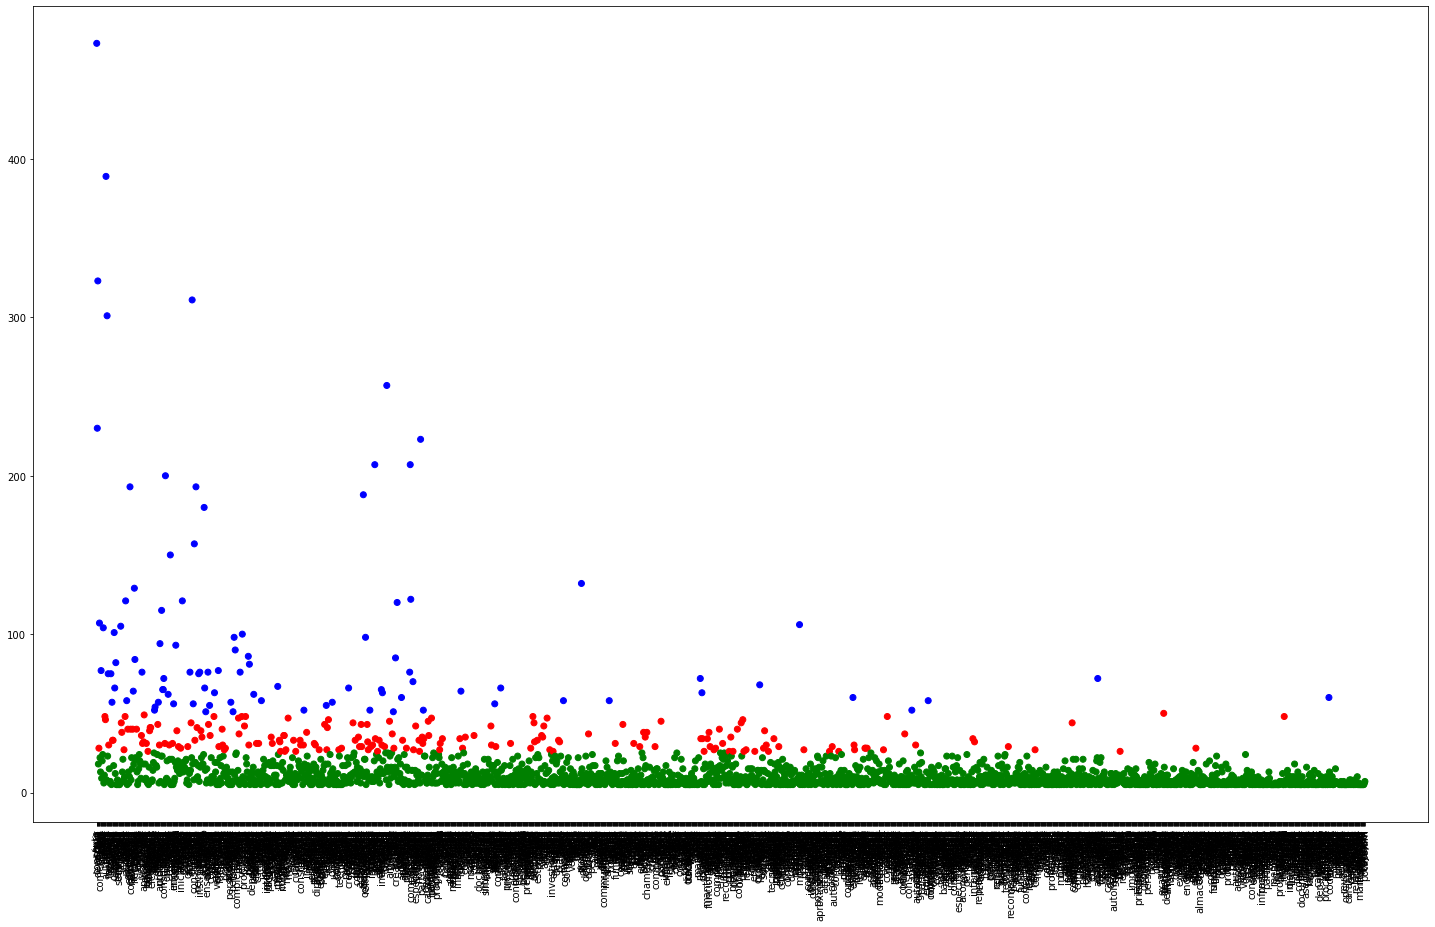

In [21]:
# posible incorporacion de widget segun frecuencia
plt.figure(figsize=(25, 15))
plt.scatter(x=dplot['word'], c=dplot['color_label'], y=dplot['count'])
plt.xticks(rotation=90)
plt.show()

## window

In [22]:
df2 = pd.read_csv('wxsent.csv')
df3 = pd.read_csv('wxpar.csv')

In [23]:
df2[df2['count']<=5]['count'].count()*100/df2['count'].count()

31.630779502587213

In [24]:
df3[df3['count']<=5]['count'].count()*100/df3['count'].count()

0.5591397849462365

In [25]:
display(df2.describe(), df3.describe())

,count
count,5991.000000
mean,9.728760
std,6.937405
min,1.000000
25%,5.000000
50%,8.000000
75%,13.000000
max,49.000000


,count
count,2325.000000
mean,25.068817
std,6.717274
min,1.000000
25%,21.000000
50%,26.000000
75%,29.000000
max,49.000000


<AxesSubplot:>

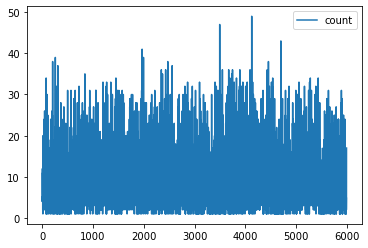

In [26]:
df2.plot()

<AxesSubplot:>

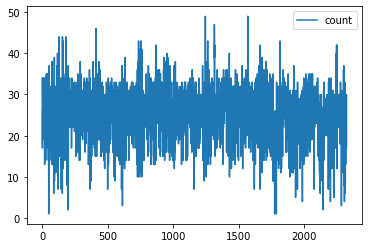

In [27]:
df3.plot() # ajustar histograma pendiente